# Hair Removal

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import cv2
import matplotlib.pyplot as plt
from skin_cancer_detection.hairremoval import hair_removal
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [4]:
skin_df['path'] = [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]

In [5]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

In [6]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


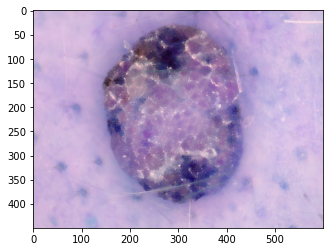

In [7]:
path = skin_df['path'][19]
img = cv2.imread(path)
final = hair_removal(img)
plt.imshow(final)

In [8]:
print(path)

../raw_data/HAM10000_all/ISIC_0032129.jpg


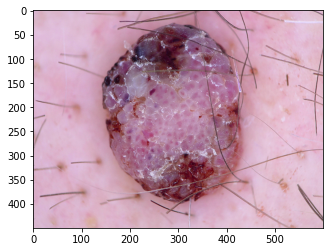

In [26]:
img = cv2.imread(skin_df['path'][19]) 
edit = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(edit)

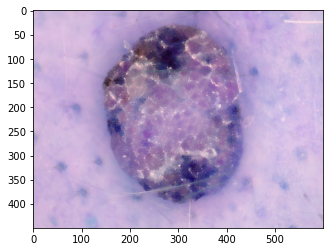

In [13]:
final_image = hair_removal(img)
# final = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.imshow(final)

In [10]:
skin_df_small = skin_df.head()

In [33]:
skin_df_small

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [62]:
for index, row in skin_df_small.iterrows():
    path = row['path']
    img = cv2.imread(path)
    image_resize = cv2.resize(img,(100,75))
    final = hair_removal(img)
    skin_df_small['image_nohair'] = final

ValueError: Length of values (450) does not match length of index (5)

In [11]:
# TEST FOR SMALL
features_list=[]
for index,row in skin_df_small.iterrows():
    path = row['path']
    image = cv2.imread(path)
    final_image = hair_removal(image)
    image_resize = cv2.resize(final_image,(100,75))
    #image_resize = cv2.resize(final_image,(341,256))
    #image_resize = cv2.resize(image,(256,256))
    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    features_list.append(final_image)

In [12]:
skin_df_small['image_nohair'] = features_list 

/var/folders/tc/h9113zwx78q6jfy2m_szx6zw0000gn/T/ipykernel_76200/1964602239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin_df_small['image_nohair'] = features_list


In [92]:
skin_df_small

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,image_nohair,image_nohair2
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[186, 149, 191], [189, 151, 194], [191, 155,...","[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[24, 13, 22], [25, 14, 23], [25, 14, 23], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 127, 136], [188, 128, 137], [191, 133,...","[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[23, 10, 15], [25, 11, 17], [24, 11, 19], [2...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[148, 103, 126], [146, 101, 125], [135, 93, ...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


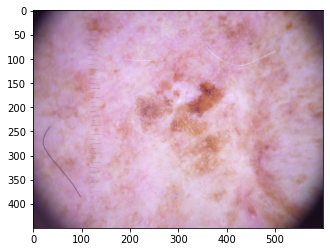

In [125]:
plt.imshow(np.array(skin_df_small['image'][1]))

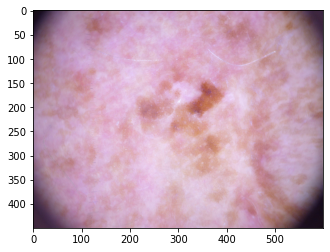

In [126]:
plt.imshow(np.array(skin_df_small['image_nohair'][1]))

# Hair removal for whole dataset

In [61]:
features_list=[]
for index,row in skin_df.iterrows():
    path = row['path']
    image = cv2.imread(path)
    final_image = hair_removal(image)
    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    features_list.append(final_image)

KeyboardInterrupt: 

In [ ]:
skin_df['image_nohair'] = features_list 

In [58]:
skin_df_small

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,image_nohair,image_nohair2
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [ ]:
plt.imshow(path[1])

In [14]:
for image in skin_df.iterrows():
    img = cv2.imread(skin_df['path'][19]) 
    skin_df['final_image'] = hair_removal(image)

ValueError: Length of values (450) does not match length of index (10015)

In [ ]:
# old path
for image in skin_df['image']:
    [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]
    img = cv2.imread(f'../raw_data/HAM10000_all/{img}.jpg')
    final_image = hairremoval.hair_removal()